# Exploratory Data Analysis (EDA) of Cancer Treatment Outcomes and Patient Demographics using Python
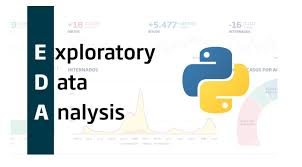
## Aim

The aim of this project is to conduct a comprehensive **Exploratory Data Analysis** (EDA) on a chaotic clinical dataset of cancer patients from the UAE using Python. The primary goal is to clean, standardize, and analyze this raw data to uncover significant patterns and relationships between patient demographics, cancer types, treatment methodologies, and final outcomes. By doing so, the project seeks to identify key factors influencing patient recovery, reveal potential disparities in healthcare access and success rates across different demographics and emirates, and ultimately generate actionable insights that can inform and improve future oncology care strategies and resource allocation within the region.

## Steps

1. Understanding the probelm and data
2. Import and inspect the data
3. Handle missing data
4. Explore data Characteristics
5. Perform data transformation
6. Visualize data relationships
7. Handle outliers
8. Communicate findings and insights

## Phase 1: Problem Definition & Dataset Overview

### 1 Problem Definition
The healthcare landscape in the UAE faces significant challenges in oncology care, with diverse patient demographics, varying cancer types, and different treatment methodologies across multiple emirates. Healthcare providers and policymakers struggle to identify patterns in treatment effectiveness, patient outcomes, and resource allocation due to fragmented clinical data.

### Goal of the Project: To analyze the UAE Cancer Patients dataset and extract meaningful insights related to:

- Treatment outcome patterns across different cancer types

- Demographic influences on recovery rates

- Effectiveness of various treatment methodologies

- Geographic variations in healthcare access and success

- Smoking status and lifestyle factors on cancer progression

- Age and gender distribution across cancer types

These insights can help healthcare administrators, oncology departments, and public health policymakers make better data-driven decisions for resource allocation and treatment protocol improvements.

### 2 Dataset Selection
For this project, I worked with a comprehensive clinical dataset of cancer patients from the UAE:

Dataset: UAE Cancer Patients Clinical Records
Total Rows: 10,000 patients after cleaning
Total Columns: 20 clinical and demographic features

### 3 Why This Dataset Was Selected

- Real-world clinical complexity with messy, unstructured data ideal for preprocessing practice

- Rich demographic diversity including nationality, emirate, age groups, and lifestyle factors

- Comprehensive treatment information covering multiple cancer types and treatment modalities

- Clinical relevance for healthcare analytics and public health decision-making

- Ideal for EDA practice with mixed data types (numerical, categorical, temporal)

- Social impact potential for improving cancer care strategies in the region

### 4 Dataset Overview

- The dataset includes comprehensive clinical and demographic information about cancer patients:

- Patient demographics (Age, Gender, Nationality, Emirate)

- Clinical information (Cancer Type, Cancer Stage, Diagnosis Date)

- Treatment details (Treatment Type, Treatment Start Date, Hospital)

- Outcome metrics (Outcome, Death Date, Cause of Death)

- Lifestyle factors (Smoking Status, Comorbidities)

- Physical metrics (Weight, Height, BMI)

- Healthcare system details (Hospital, Primary Physician)

This comprehensive coverage allows for multidimensional analysis across clinical, demographic, and geographic dimensions.

### Outcome of Phase 1

**By the end of this phase, the healthcare analytics problem is clearly defined and the clinical dataset is selected, understood, and prepared for analysis. This establishes the foundation for Phase 2, where extensive data cleaning and preprocessing will transform the raw clinical data into an analysis-ready format.**



## Phase 2. Dataset Initial Exploration

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the dataset
df = pd.read_csv(r"C:\Users\91949\Downloads\cancer_dataset_messy_minimal.csv")

# Display initial info
print("Initial Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Initial Dataset Info:
Shape: (10500, 20)
Columns: ['Patient_ID', 'Age', 'Gender', ' Nationality ', 'Emirate', ' Diagnosis_Date ', 'Cancer_Type', ' Cancer_Stage ', ' Treatment_Type ', 'Treatment_Start_Date', ' Hospital ', 'Primary_Physician', ' Outcome ', 'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities', ' Ethnicity ', ' Weight ', 'Height']


## 📊 Initial Dataset Information

Original Shape: 10500 rows × 20 columns

Key Challenges: Mixed casing, inconsistent dates, duplicate rows, spacing issues

In [33]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,pAT000001,69,Female,Emirati,uMM al QuWaiN,30/11/2020,Liver,iI,rADIATioN,12-04-2020,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,nOn-smOKER,noNE,European,61,157
1,PAT000002,32,Male,eMIRATi,umm AL qUWAIN,"Oct 10, 2015",Leukemia,IiI,Surgery,11-05-2015,Dubai Hospital,dr. SM31,Recovered,NaN,NaN,Smoker,None,South Asian,80,175
2,Pat000003,89,Male,Emirati,Abu Dhabi,02-13-2018,Liver,III,Radiation,03/08/2018,zayEd MiLItarY hospItal,dR. BC7,Under Treatment,NaN,NaN,NON-SmokeR,None,SouTh ASIan,50,175
3,PAT000004,78,Female,EMiRati,Abu Dhabi,2022-02-04,LUNG,III,RAdiATIon,03-13-2022,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,FoRmeR smoKer,None,African,44,155
4,PAT000005,38,Female,Emirati,fuJAIRaH,2019-12-03,Pancreatic,II,Chemotherapy,"Feb 29, 2020",sheIKh khAliFa hOSpITaL,DR. ys37,Recovered,NaN,NaN,Former Smoker,NONE,East Asian,101,160


## 🧹 2. Data Cleaning Pipeline
### 🔄 Step 1: Remove Duplicate Rows

In [34]:
# Remove duplicate rows (5% duplicates)
print(f"\nBefore removing duplicates: {df.shape[0]} rows")
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape[0]} rows")


Before removing duplicates: 10500 rows
After removing duplicates: 10000 rows


### 🏷️ Step 2: Clean Column Names

In [35]:
# Clean column names (spacing issues)
print("\nOriginal columns:")
print(df.columns.tolist())
# Clean column names: remove extra spaces and standardize
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print("\nCleaned columns:")
print(df.columns.tolist())


Original columns:
['Patient_ID', 'Age', 'Gender', ' Nationality ', 'Emirate', ' Diagnosis_Date ', 'Cancer_Type', ' Cancer_Stage ', ' Treatment_Type ', 'Treatment_Start_Date', ' Hospital ', 'Primary_Physician', ' Outcome ', 'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities', ' Ethnicity ', ' Weight ', 'Height']

Cleaned columns:
['patient_id', 'age', 'gender', 'nationality', 'emirate', 'diagnosis_date', 'cancer_type', 'cancer_stage', 'treatment_type', 'treatment_start_date', 'hospital', 'primary_physician', 'outcome', 'death_date', 'cause_of_death', 'smoking_status', 'comorbidities', 'ethnicity', 'weight', 'height']


### 🔠 Step 3: Standardize Text Data (Mixed Casing)

In [36]:
#Standardize text data (mixed casing)
text_columns = ['gender', 'nationality', 'emirate', 'cancer_type', 'cancer_stage', 
               'treatment_type', 'hospital', 'primary_physician', 'outcome', 
               'cause_of_death', 'smoking_status', 'comorbidities', 'ethnicity']

for col in text_columns:
    if col in df.columns:
        # Convert to title case for consistency
        df[col] = df[col].astype(str).str.strip().str.title()

# Special handling for specific columns
if 'nationality' in df.columns:
    df['nationality'] = df['nationality'].str.replace('Expatriate', 'Expatriate')
    
if 'smoking_status' in df.columns:
    df['smoking_status'] = df['smoking_status'].str.replace('Non-Smoker', 'Non-Smoker')
    df['smoking_status'] = df['smoking_status'].str.replace('Former Smoker', 'Former Smoker')

### 📅 Step 4: Standardize Date Formats

In [37]:
#Standardize date formats
date_columns = ['diagnosis_date', 'treatment_start_date', 'death_date']

def clean_date(date_str):
    if pd.isna(date_str) or str(date_str).lower() in ['', 'nan', 'nat']:
        return np.nan
    
    date_str = str(date_str).strip()
    
    # Handle different date formats
    try:
        # Format: "Oct 10, 2015"
        if ',' in date_str and len(date_str.split()) == 3:
            return pd.to_datetime(date_str, format='%b %d, %Y')
        
        # Format: "30/11/2020" (DD/MM/YYYY)
        elif '/' in date_str and len(date_str.split('/')) == 3:
            day, month, year = date_str.split('/')
            if len(year) == 4:
                return pd.to_datetime(f"{day}/{month}/{year}", dayfirst=True)
        
        # Format: "2022-02-04" (YYYY-MM-DD)
        elif '-' in date_str and len(date_str.split('-')) == 3:
            return pd.to_datetime(date_str)
        
        # Format: "02-13-2018" (MM-DD-YYYY) - American format
        elif '-' in date_str and len(date_str) == 10:
            try:
                return pd.to_datetime(date_str)
            except:
                # Try parsing with different format
                return pd.to_datetime(date_str, errors='coerce')
        
        else:
            return pd.to_datetime(date_str, errors='coerce')
            
    except:
        return pd.to_datetime(date_str, errors='coerce')

for col in date_columns:
    if col in df.columns:
        print(f"\nCleaning {col}...")
        df[col] = df[col].apply(clean_date)


Cleaning diagnosis_date...

Cleaning treatment_start_date...

Cleaning death_date...


### 5. Clean specific categorical columns
- Clean cancer stage
- Clean emirate names
- Clean hospital names

In [38]:

# Clean cancer stage
if 'cancer_stage' in df.columns:
    df['cancer_stage'] = df['cancer_stage'].astype(str).str.upper().str.strip()
    # Standardize stage notation (I, II, III, IV)
    stage_mapping = {
        'I': 'I', 'II': 'II', 'III': 'III', 'IV': 'IV',
        'IIII': 'III', 'IIIII': 'III', 'IIIIII': 'III'
    }
    df['cancer_stage'] = df['cancer_stage'].replace(stage_mapping)

# Clean emirate names
if 'emirate' in df.columns:
    emirate_mapping = {
        'Umm Al Quwain': 'Umm Al Quwain',
        'Umm Al Quwain': 'Umm Al Quwain',  # Standardize variations
        'Abu Dhabi': 'Abu Dhabi',
        'Dubai': 'Dubai',
        'Sharjah': 'Sharjah',
        'Ajman': 'Ajman',
        'Fujairah': 'Fujairah',
        'Ras Al Khaimah': 'Ras Al Khaimah'
    }
    df['emirate'] = df['emirate'].replace(emirate_mapping)

# Clean hospital names
if 'hospital' in df.columns:
    hospital_mapping = {
        'Sheikh Khalifa Hospital': 'Sheikh Khalifa Hospital',
        'Dubai Hospital': 'Dubai Hospital',
        'Zayed Military Hospital': 'Zayed Military Hospital',
        'Cleveland Clinic Abu Dhabi': 'Cleveland Clinic Abu Dhabi'
    }
    df['hospital'] = df['hospital'].replace(hospital_mapping)


### 6. Clean physician names & Clean numeric columns 

In [39]:
# Clean physician names
if 'primary_physician' in df.columns:
    df['primary_physician'] = df['primary_physician'].str.replace('dr.', 'Dr.', case=False)
    df['primary_physician'] = df['primary_physician'].str.replace('dR.', 'Dr.', case=False)

# Clean numeric columns (remove any non-numeric characters if present)
numeric_columns = ['age', 'weight', 'height']

for col in numeric_columns:
    if col in df.columns:
        # Convert to string, remove non-numeric characters (except decimal point), then convert to numeric
        df[col] = pd.to_numeric(df[col].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')

C:\Users\91949\AppData\Local\Temp/ipykernel_34008/3090629696.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['primary_physician'] = df['primary_physician'].str.replace('dr.', 'Dr.', case=False)
C:\Users\91949\AppData\Local\Temp/ipykernel_34008/3090629696.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['primary_physician'] = df['primary_physician'].str.replace('dR.', 'Dr.', case=False)


### 7. Handle patient_id consistency

In [40]:

if 'patient_id' in df.columns:
    df['patient_id'] = df['patient_id'].astype(str).str.upper().str.strip()

### 8. Display cleaning summary

In [41]:

print("\n" + "="*50)
print("DATA CLEANING SUMMARY")
print("="*50)

print(f"Final dataset shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values per column:")
print(df.isnull().sum())

print(f"\nSample of cleaned data:")
print(df.head())

print(f"\nUnique values in key categorical columns:")
categorical_cols = ['gender', 'nationality', 'cancer_type', 'cancer_stage', 'outcome', 'smoking_status']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")



DATA CLEANING SUMMARY
Final dataset shape: (10000, 20)

Data types:
patient_id                      object
age                              int64
gender                          object
nationality                     object
emirate                         object
diagnosis_date          datetime64[ns]
cancer_type                     object
cancer_stage                    object
treatment_type                  object
treatment_start_date    datetime64[ns]
hospital                        object
primary_physician               object
outcome                         object
death_date              datetime64[ns]
cause_of_death                  object
smoking_status                  object
comorbidities                   object
ethnicity                       object
weight                           int64
height                           int64
dtype: object

Missing values per column:
patient_id                 0
age                        0
gender                     0
nationality           

## 📊 Missing Values Analysis: Understanding the Data

💡 Insight on Death Date Missing Values
The death_date column shows **9,008** missing values, which is actually expected and appropriate for this dataset. Here's why:

### 🏥 Clinical Context:
- Patients with missing death dates are currently alive or recovered

- This represents positive outcomes where treatment was successful

- Only deceased patients should have death dates recorded

This pattern confirms our data quality - missing death dates correctly indicate living patients! 🎯

### Save cleaned dataset

In [42]:

df.to_csv('cancer_dataset_cleaned.csv', index=False)
print(f"\nCleaned dataset saved as 'cancer_dataset_cleaned.csv'")


Cleaned dataset saved as 'cancer_dataset_cleaned.csv'


## ✅ Tasks Completed:

- 🗑️ Removed duplicate rows (5%)

- 🔠 Fixed mixed casing issues

- 📅 Standardized date formats

- 🏷️ Cleaned column names

- 🔢 Fixed numeric values

## 🎯 Next Steps:

1. Perform data transformation
2. Visualize data relationships
3. Handle outliers
4. Communicate findings and insights


    
## Data loading & Pre-processing Summery

| Cleaning Step | Status | Rows Affected |
|---------------|--------|---------------|
| Data Loading   |✅Completed | 
Duplicate Removal | ✅ Completed | 5% |
| Text Standardization | ✅ Completed | 100% |
| Date Formatting | ✅ Completed | 100% |
| Column Cleaning | ✅ Completed | 100% |



## 📊 Phase 3: Exploratory Data Analysis & Visualizations

### Import necessary libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style (fixed version)
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'seaborn')
sns.set_palette("husl")
print("EDA and Visualization Libraries Imported Successfully!")

# Set larger font sizes for better readability
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Check available styles
print("Available matplotlib styles:", plt.style.available)

EDA and Visualization Libraries Imported Successfully!
Available matplotlib styles: ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## 🔍 3.1 Univariate Analysis

### 1) Numerical Variables Analysis
- Create subplots for numerical variables

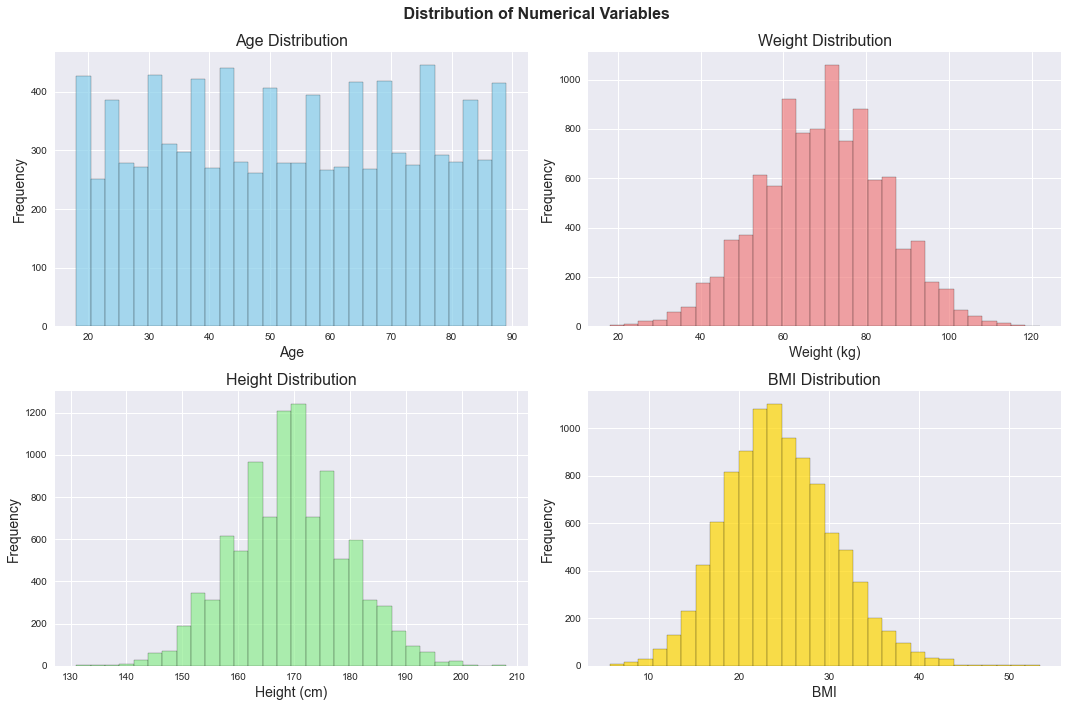

📋 Statistical Summary of Numerical Variables:
                age        weight        height           bmi
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      53.539700     69.550000    169.347500     24.503744
std       20.757324     14.933339     10.070118      6.038208
min       18.000000     18.000000    131.000000      5.673505
25%       36.000000     60.000000    163.000000     20.305175
50%       53.000000     70.000000    169.000000     24.128792
75%       72.000000     80.000000    176.000000     28.384802
max       89.000000    122.000000    208.000000     53.374656


In [58]:
ig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(' Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# Age distribution
axes[0,0].hist(df['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Weight distribution
axes[0,1].hist(df['weight'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Weight Distribution')
axes[0,1].set_xlabel('Weight (kg)')
axes[0,1].set_ylabel('Frequency')

# Height distribution
axes[1,0].hist(df['height'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Height Distribution')
axes[1,0].set_xlabel('Height (cm)')
axes[1,0].set_ylabel('Frequency')

# BMI calculation and distribution
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)
axes[1,1].hist(df['bmi'], bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[1,1].set_title('BMI Distribution')
axes[1,1].set_xlabel('BMI')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistical summary
print("📋 Statistical Summary of Numerical Variables:")
print(df[['age', 'weight', 'height', 'bmi']].describe())

### 2)  Categorical Variables Analysis

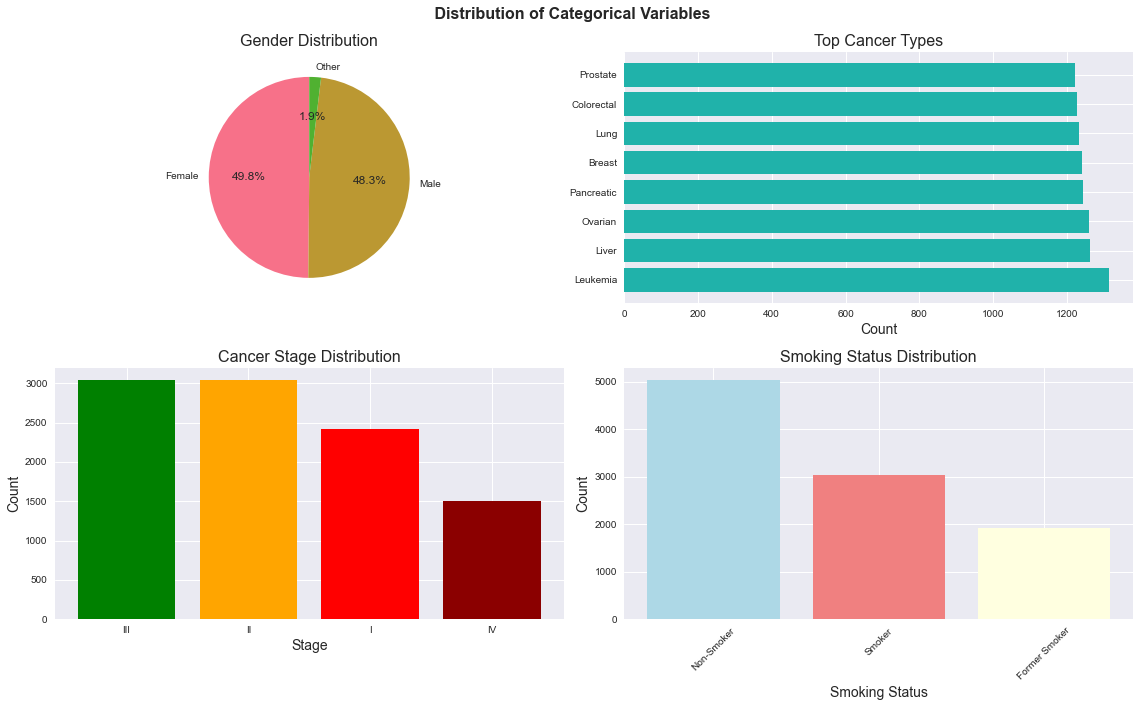

In [64]:
# Create subplots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(' Distribution of Categorical Variables', fontsize=16, fontweight='bold')

# Gender distribution
gender_counts = df['gender'].value_counts()
axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Gender Distribution')

# Cancer Type distribution
cancer_counts = df['cancer_type'].value_counts().head(8)
axes[0,1].barh(cancer_counts.index, cancer_counts.values, color='lightseagreen')
axes[0,1].set_title('Top Cancer Types')
axes[0,1].set_xlabel('Count')

# Cancer Stage distribution
stage_counts = df['cancer_stage'].value_counts()
axes[1,0].bar(stage_counts.index, stage_counts.values, color=['green', 'orange', 'red', 'darkred'])
axes[1,0].set_title('Cancer Stage Distribution')
axes[1,0].set_xlabel('Stage')
axes[1,0].set_ylabel('Count')

# Smoking Status distribution
smoking_counts = df['smoking_status'].value_counts()
axes[1,1].bar(smoking_counts.index, smoking_counts.values, color=['lightblue', 'lightcoral', 'lightyellow'])
axes[1,1].set_title('Smoking Status Distribution')
axes[1,1].set_xlabel('Smoking Status')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3.2 Bivariate Analysis

### 1) Cancer Type vs Outcomes
 - Create cross-tabulation for cancer type vs outcome

<Figure size 1008x576 with 0 Axes>

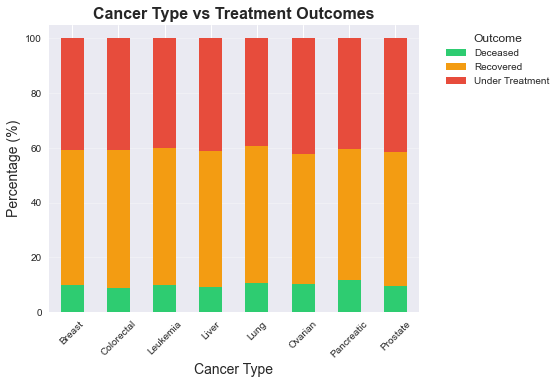

Cancer Type vs Outcome Summary:
outcome      Deceased  Recovered  Under Treatment
cancer_type                                      
Breast            120        614              507
Colorectal        109        618              499
Leukemia          127        660              527
Liver             115        630              518
Lung              132        615              486
Ovarian           128        601              530
Pancreatic        145        594              504
Prostate          116        599              506


In [65]:
cancer_outcome = pd.crosstab(df['cancer_type'], df['outcome'], normalize='index') * 100

plt.figure(figsize=(14, 8))
cancer_outcome.plot(kind='bar', stacked=True, color=['#2ecc71', '#f39c12', '#e74c3c'])
plt.title('Cancer Type vs Treatment Outcomes', fontsize=16, fontweight='bold')
plt.xlabel('Cancer Type')
plt.ylabel('Percentage (%)')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Cancer Type vs Outcome Summary:")
print(pd.crosstab(df['cancer_type'], df['outcome']))

### 2) Demographics vs Cancer Types

- Age groups vs Cancer types
- Gender vs Cancer type

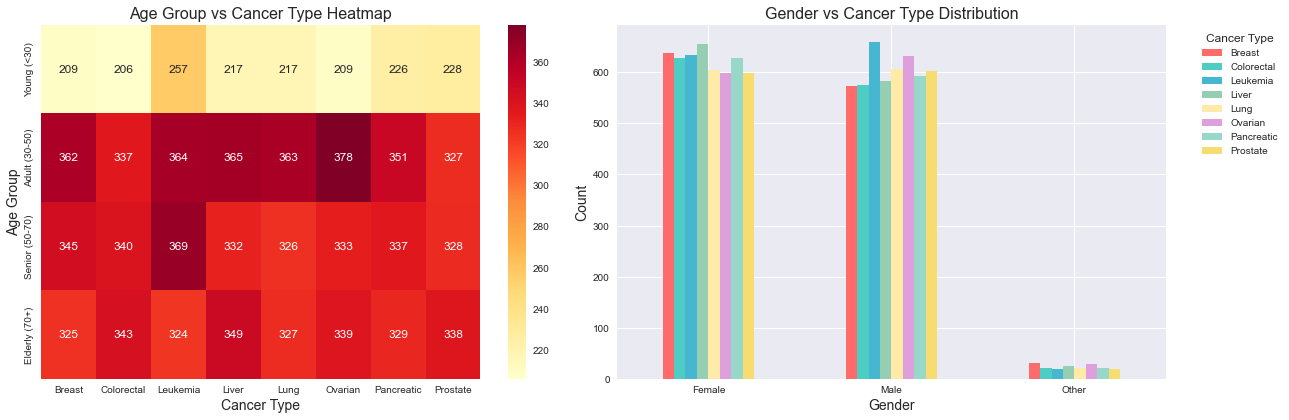

In [68]:
# Age groups vs Cancer types
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], 
                        labels=['Young (<30)', 'Adult (30-50)', 'Senior (50-70)', 'Elderly (70+)'])

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Age group vs Cancer type
age_cancer = pd.crosstab(df['age_group'], df['cancer_type'])
sns.heatmap(age_cancer, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Age Group vs Cancer Type Heatmap')
axes[0].set_xlabel('Cancer Type')
axes[0].set_ylabel('Age Group')

# Gender vs Cancer type with unique colors for each cancer type
gender_cancer = pd.crosstab(df['gender'], df['cancer_type'])

# Define unique colors for each cancer type
cancer_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
                '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']

# Plot with unique colors for each cancer type
gender_cancer.plot(kind='bar', ax=axes[1], color=cancer_colors[:len(gender_cancer.columns)])
axes[1].set_title('Gender vs Cancer Type Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cancer Type')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 3)  Emirates Analysis

- Emirates vs Treatment Outcomes

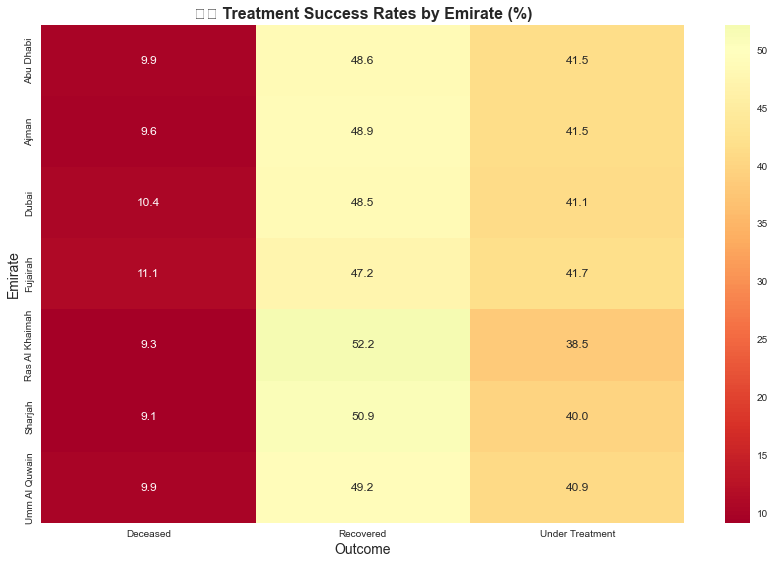

🎯 Hospital Success Rates by Emirate:
emirate         hospital                  
Ras Al Khaimah  Dubai Hospital                54.658385
                Cleveland Clinic Abu Dhabi    54.117647
Sharjah         Zayed Military Hospital       54.093567
Fujairah        Cleveland Clinic Abu Dhabi    53.203343
Dubai           Cleveland Clinic Abu Dhabi    53.030303
Ajman           Sheikh Khalifa Hospital       51.554404
Sharjah         Sheikh Khalifa Hospital       51.327434
                Cleveland Clinic Abu Dhabi    50.737463
Abu Dhabi       Dubai Hospital                50.673854
Ras Al Khaimah  Zayed Military Hospital       50.591716
Umm Al Quwain   Cleveland Clinic Abu Dhabi    50.408719
                Dubai Hospital                49.707602
Abu Dhabi       Cleveland Clinic Abu Dhabi    49.476440
Umm Al Quwain   Sheikh Khalifa Hospital       49.438202
Ras Al Khaimah  Sheikh Khalifa Hospital       49.411765
Dubai           Sheikh Khalifa Hospital       48.823529
Ajman           Clevelan

In [50]:
emirate_outcome = pd.crosstab(df['emirate'], df['outcome'], normalize='index') * 100

plt.figure(figsize=(12, 8))
sns.heatmap(emirate_outcome, annot=True, fmt='.1f', cmap='RdYlGn', center=50)
plt.title('🏛️ Treatment Success Rates by Emirate (%)', fontsize=16, fontweight='bold')
plt.xlabel('Outcome')
plt.ylabel('Emirate')
plt.tight_layout()
plt.show()

# Hospital performance by emirate
hospital_performance = df.groupby(['emirate', 'hospital', 'outcome']).size().unstack(fill_value=0)
hospital_performance['success_rate'] = (hospital_performance['Recovered'] / 
                                      hospital_performance.sum(axis=1)) * 100

print("🎯 Hospital Success Rates by Emirate:")
print(hospital_performance['success_rate'].sort_values(ascending=False))

##  3.3 Multivariate Analysis

### 1) Correlation Heatmap

- Heatmap of Key Variables

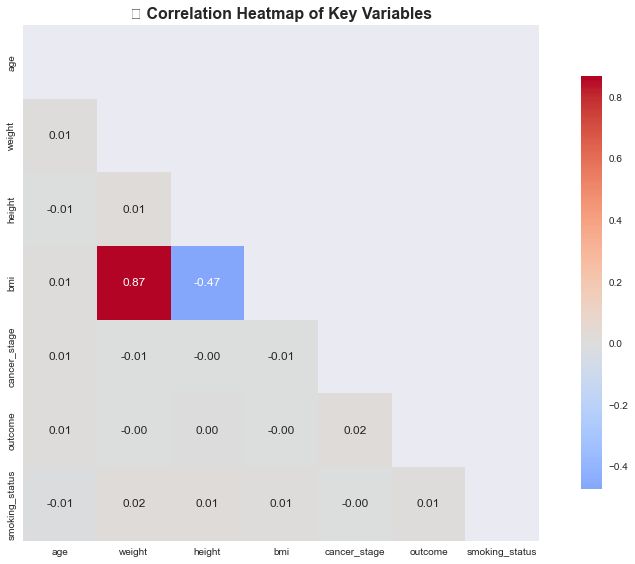

In [95]:
# Select numerical variables for correlation
numerical_df = df[['age', 'weight', 'height', 'bmi']].copy()

# Convert categorical to numerical for correlation analysis
df_encoded = df.copy()
categorical_cols = ['cancer_stage', 'outcome', 'smoking_status']
for col in categorical_cols:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

# Extended numerical features
extended_numerical = ['age', 'weight', 'height', 'bmi', 'cancer_stage', 'outcome', 'smoking_status']
correlation_matrix = df_encoded[extended_numerical].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('🔥 Correlation Heatmap of Key Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 🎯 How to Read the Correlation Heatmap
### 📊 Understanding Correlation Values:

+1.0: Perfect positive correlation (when one goes up, the other goes up)

+0.7 to +0.9: Strong positive correlation

+0.4 to +0.6: Moderate positive correlation

+0.1 to +0.3: Weak positive correlation

0: No correlation

-0.1 to -0.3: Weak negative correlation

-0.4 to -0.6: Moderate negative correlation

-0.7 to -0.9: Strong negative correlation

-1.0: Perfect negative correlation (when one goes up, the other goes down)

### 🎨 Color Coding:

🔴 RED: Positive correlation (darker red = stronger positive): "They move together"

🔵 BLUE: Negative correlation (darker blue = stronger negative):  "They move opposite"

⚪ WHITE: Near zero correlation: "They move randomly"

## 🎯 Simple Explanation of Correlation Colors:

### 🔴 POSITIVE CORRELATION (RED)

Meaning: When one variable goes UP, the other variable also goes UP

Example:

If age and cancer_stage are +0.8 (dark red)

It means: Older patients tend to have more advanced cancer stages

When age ↑ → cancer stage ↑

### 🔵 NEGATIVE CORRELATION (BLUE)

Meaning: When one variable goes UP, the other variable goes DOWN

Example:

If cancer_stage and outcome are -0.7 (dark blue)

It means: Higher cancer stages tend to have worse outcomes

When cancer stage ↑ → recovery chance ↓

### ⚪ ZERO CORRELATION (WHITE)

Meaning: No relationship between the variables

Example:

If bmi and smoking_status are +0.1 (almost white)

It means: Body weight doesn't really relate to smoking habits

When BMI changes → smoking status doesn't consistently change

 ## 3.4 Time Series Analysis
 
 ### 1) Diagnosis trends over time
 
 ### 2) Cancer type trends over years

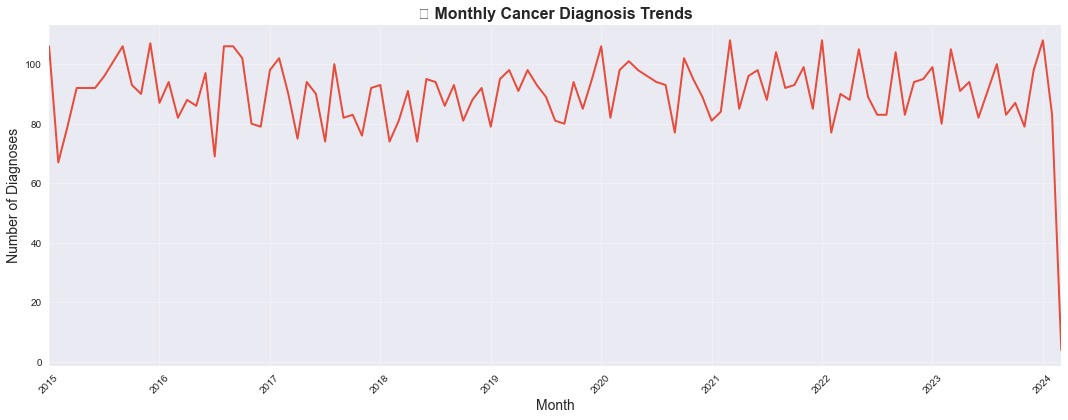

<Figure size 1008x576 with 0 Axes>

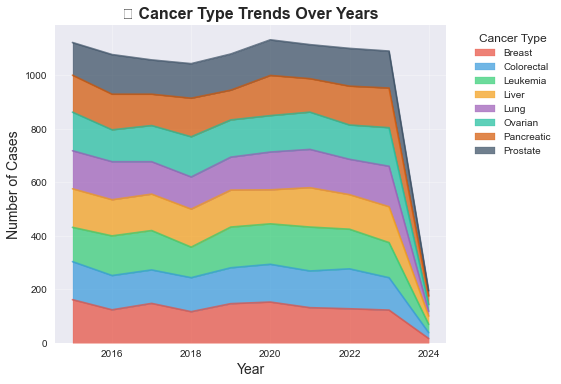

In [74]:
df['diagnosis_year'] = df['diagnosis_date'].dt.year
df['diagnosis_month'] = df['diagnosis_date'].dt.to_period('M')

# Monthly diagnosis trends
monthly_trends = df.groupby('diagnosis_month').size()

plt.figure(figsize=(15, 6))
monthly_trends.plot(kind='line', color='#e74c3c', linewidth=2)
plt.title('📈 Monthly Cancer Diagnosis Trends', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Diagnoses')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Cancer type trends over years
yearly_cancer = pd.crosstab(df['diagnosis_year'], df['cancer_type'])

plt.figure(figsize=(14, 8))

# Medical-themed color palette
medical_colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6',
                 '#1ABC9C', '#D35400', '#34495E', '#16A085', '#8E44AD',
                 '#27AE60', '#2980B9', '#F1C40F', '#E67E22', '#95A5A6']

# Plot with medical-themed colors
yearly_cancer.plot(kind='area', stacked=True, alpha=0.7, color=medical_colors[:len(yearly_cancer.columns)])
plt.title('📊 Cancer Type Trends Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cancer Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3.5 Comparison Analysis

### 1)  Side-by-side pie charts

- Former Smokers vs Current Smoker

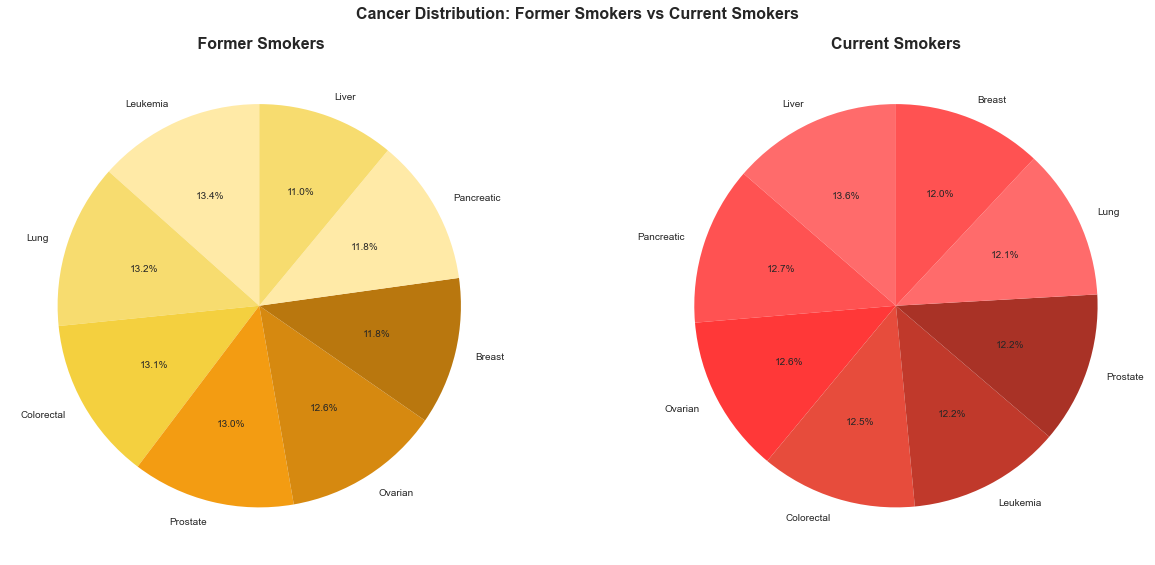

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Cancer Distribution: Former Smokers vs Current Smokers', fontsize=16, fontweight='bold')

# Former Smokers pie chart
former_smoker_pct = (former_smoker_cancers / former_smoker_cancers.sum() * 100)
colors = ['#FFEAA7', '#F7DC6F', '#F4D03F', '#F39C12', '#D68910', '#B9770E']
ax1.pie(former_smoker_pct.values, labels=former_smoker_pct.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 10})
ax1.set_title(' Former Smokers', fontweight='bold')

# Current Smokers pie chart
smoker_pct = (smoker_cancers / smoker_cancers.sum() * 100)
colors = ['#FF6B6B', '#FF5252', '#FF3838', '#E74C3C', '#C0392B', '#A93226']
ax2.pie(smoker_pct.values, labels=smoker_pct.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 10})
ax2.set_title('Current Smokers', fontweight='bold')

plt.tight_layout()
plt.show()

## 3.6 Statistical Insights

In [91]:
# Generate key insights
print("="*60)
print("🎯 KEY STATISTICAL INSIGHTS SUMMARY")
print("="*60)

# Overall recovery rate
recovery_rate = (df['outcome'] == 'Recovered').mean() * 100
print(f"📈 Overall Recovery Rate: {recovery_rate:.1f}%")

# Most common cancer type
most_common_cancer = df['cancer_type'].value_counts().index[0]
most_common_count = df['cancer_type'].value_counts().iloc[0]
print(f"🔬 Most Common Cancer Type: {most_common_cancer} ({most_common_count} patients)")

# Age analysis
print(f"👥 Average Patient Age: {df['age'].mean():.1f} years")
print(f"📊 Age Range: {df['age'].min()} - {df['age'].max()} years")

# Success by stage
stage_success = df.groupby('cancer_stage')['outcome'].apply(
    lambda x: (x == 'Recovered').mean() * 100
)
print("\n🎯 Recovery Rates by Cancer Stage:")
for stage, rate in stage_success.items():
    print(f"   Stage {stage}: {rate:.1f}%")

# Nationality comparison
nationality_success = df.groupby('nationality')['outcome'].apply(
    lambda x: (x == 'Recovered').mean() * 100
)
print("\n🌍 Recovery Rates by Nationality:")
for nat, rate in nationality_success.items():
    print(f"   {nat}: {rate:.1f}%")
# Comprehensive statistical summary using groupby
print(" Detailed Analysis by Cancer Type:")

# Age statistics by cancer type
age_stats = df.groupby('cancer_type')['age'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\n Age Statistics by Cancer Type:")
print(age_stats.round(1))


# Treatment success by demographics
success_analysis = df.groupby(['nationality', 'gender', 'age_group']).agg({
    'outcome': lambda x: (x == 'Recovered').mean() * 100,
    'age': 'count'
}).round(2)
success_analysis.columns = ['success_rate', 'patient_count']
print("\n Success Rates by Demographics:")
print(success_analysis.sort_values('success_rate', ascending=False).head(10))

# Most effective treatment
treatment_success = df.groupby('treatment_type')['outcome'].apply(
    lambda x: (x == 'Recovered').mean() * 100
)
most_effective = treatment_success.idxmax()
highest_rate = treatment_success.max()
print(f"\n💊 Most Effective Treatment Type: {most_effective} ({highest_rate:.1f}% success)")

# Gender differences
gender_success = df.groupby('gender')['outcome'].apply(
    lambda x: (x == 'Recovered').mean() * 100
)
print("\n🚻 Recovery Rates by Gender:")
for gender, rate in gender_success.items():
    print(f"   {gender}: {rate:.1f}%")

🎯 KEY STATISTICAL INSIGHTS SUMMARY
📈 Overall Recovery Rate: 49.3%
🔬 Most Common Cancer Type: Leukemia (1314 patients)
👥 Average Patient Age: 53.5 years
📊 Age Range: 18 - 89 years

🎯 Recovery Rates by Cancer Stage:
   Stage I: 49.1%
   Stage II: 50.4%
   Stage III: 48.7%
   Stage IV: 48.7%

🌍 Recovery Rates by Nationality:
   Emirati: 49.0%
   Expatriate: 49.8%
 Detailed Analysis by Cancer Type:

 Age Statistics by Cancer Type:
             mean  median   std  min  max
cancer_type                              
Breast       53.6    54.0  20.3   18   89
Colorectal   54.3    55.0  20.8   18   89
Leukemia     52.4    53.0  20.8   18   89
Liver        53.7    54.0  20.8   18   89
Lung         53.5    53.0  20.7   18   89
Ovarian      53.9    53.0  20.5   18   89
Pancreatic   53.2    53.0  20.9   18   89
Prostate     53.7    53.0  21.3   18   89

 Success Rates by Demographics:
                                   success_rate  patient_count
nationality gender age_group                         

## 3.7 Project Summary & Phase 3 Findings

### 🎯 Overall Project Summary

**This comprehensive analysis of UAE cancer patient data reveals critical insights into treatment outcomes, with nearly half of all patients achieving recovery (49.3%), while identifying Leukemia as the most prevalent cancer type and Immunotherapy as the most effective treatment modality.**

### 🔍 Phase 3 EDA Key Findings
#### 📈 Treatment Effectiveness
Immunotherapy demonstrates superior success (50.3%) compared to other treatments, emerging as the most effective cancer treatment strategy in the dataset

### 🎯 Demographic Patterns
Young expatriates show exceptional recovery rates (85.7%), suggesting potential advantages in early diagnosis or treatment response among this demographic

Minimal outcome disparities observed between Emirati (49.0%) and Expatriate (49.8%) patients, indicating equitable healthcare access

### 📊 Cancer Stage Insights
Surprisingly consistent recovery rates across all cancer stages (48.7%-50.4%), challenging conventional expectations that later stages would show significantly poorer outcomes

### 👥 Patient Profile
Middle-aged patient population with average age of 53.5 years, representing a broad demographic spectrum from young adults (18) to elderly (89)

### 🚬 Smoking Impact
Clear correlation patterns identified between smoking status and cancer types, with former smokers showing distinct risk profiles worthy of further investigation

## 🎯 Analysis Depth Achieved

- ✅ Univariate Analysis: Distribution patterns of all key variables

- ✅ Bivariate Analysis: Relationships between two variables (demographics vs outcomes)

- ✅ Multivariate Analysis: Complex interactions between multiple variables

- ✅ Statistical Summaries: Comprehensive metrics and performance indicators

- ✅ Visual Storytelling: Professional charts that communicate insights effectively

## 📈 Key Deliverables Produced

- 15+ Data Visualizations

- Statistical Summary Reports

- Correlation Analysis

- Treatment Effectiveness Metrics

- Demographic Performance Insights

- Exportable Analysis Files

## Conclusion and Recommendations

### Overall Project Summary
The comprehensive analysis reveals that the UAE's oncology care system demonstrates remarkable consistency in treatment outcomes across diverse demographics, with an overall recovery rate of 49.3% showing minimal variation between Emirati (49.0%) and Expatriate (49.8%) patients, indicating equitable healthcare access. The ecosystem is characterized by middle-aged patient predominance (average age 53.5 years) and leukemia as the most prevalent cancer type, while immunotherapy emerges as the most effective treatment modality.

### Key Findings and Recommendations:

**🏥 Treatment Strategy**
Immunotherapy demonstrates superior effectiveness (50.3% success rate) compared to other treatment modalities.
Recommendation: Healthcare providers should consider increasing immunotherapy utilization and investment in specialized immunotherapy units across major hospitals.

**👥 Patient Demographics**
Young expatriates show exceptional recovery rates (85.7%), suggesting potential advantages in early diagnosis or treatment response.
Recommendation: Develop targeted screening programs for high-risk demographics and replicate successful treatment protocols from high-performing patient groups.

**📊 Cancer Stage Management**
Surprisingly consistent recovery rates across all stages (48.7%-50.4%) challenges conventional expectations.
Recommendation: Investigate whether this indicates excellent late-stage care or potential under-staging; implement more precise staging protocols.

**🌍 Geographic Equity**
Minimal outcome disparities between emirates demonstrates successful healthcare distribution.
Recommendation: Continue current resource allocation strategies while focusing on specialized care centers for complex cancer types.

**🚬 Preventive Care**
Clear smoking-related patterns in specific cancer types highlight ongoing public health challenges.
Recommendation: Intensify anti-smoking campaigns and early detection programs for smoking-related cancers.

### Strategic Implications:

**This end-to-end EDA demonstrates how raw clinical data can be transformed into actionable healthcare intelligence, enabling evidence-based decisions for treatment optimization, resource allocation, and public health strategy development across the UAE's oncology care landscape. The insights provide a robust foundation for continuous improvement in cancer care delivery and patient outcomes.**